### 1. Import Libraries and Read Data

In [54]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_rows', 200, 'display.max_columns', 200)
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
raw_df = pd.read_csv("data/loan.csv")

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


1. Remove current status loans
2. Drop unnecessary columns not related to the loans
3. Fix Rows and columns. ensure standardized naming.
4. Identify a single unique identifier
5. Identify missing values. 
5a. Ignore columns with majoirty missing value
5b. use missing value replacement techniques
6. Fix invalid values
7. Outlier Treatment
8. Standardize values


In [3]:
raw_df.shape

(39717, 111)

## 2. Data Cleaning

In [4]:
raw_df.head(5) ## Check for header and footer rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
## check for empty/weird column names
for col in raw_df.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

#### Delete Columns with large percent of null values

In [6]:
## Identify presence of null values and add columns to a list to delete column above a certain threshold of null values
null_percentage = (raw_df.isnull().sum() / raw_df.shape[0] * 100.00).reset_index()
null_percentage.columns = ['column_name','null_percent']
null_percentage = null_percentage.sort_values('null_percent', ascending=False)
null_percentage

,column_name,null_percent
55,verification_status_joint,100.00
53,annual_inc_joint,100.00
81,mo_sin_old_rev_tl_op,100.00
80,mo_sin_old_il_acct,100.00
77,bc_util,100.00
76,bc_open_to_buy,100.00
75,avg_cur_bal,100.00
74,acc_open_past_24mths,100.00
73,inq_last_12m,100.00
72,total_cu_tl,100.00


In [7]:
columns_to_remove = null_percentage[null_percentage.null_percent>=30].column_name.to_list()# for this data 30% seems right

#### Select a single ID column out of member_id and id

In [8]:
# Choose one id column
raw_df.id.nunique(), raw_df.member_id.nunique() # there is unique per row, we can drop either of them

(39717, 39717)

In [9]:
columns_to_remove.append('member_id')

In [10]:
columns_to_remove

['verification_status_joint',
 'annual_inc_joint',
 'mo_sin_old_rev_tl_op',
 'mo_sin_old_il_acct',
 'bc_util',
 'bc_open_to_buy',
 'avg_cur_bal',
 'acc_open_past_24mths',
 'inq_last_12m',
 'total_cu_tl',
 'inq_fi',
 'total_rev_hi_lim',
 'all_util',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'il_util',
 'total_bal_il',
 'mths_since_rcnt_il',
 'open_il_24m',
 'open_il_12m',
 'open_il_6m',
 'open_acc_6m',
 'tot_cur_bal',
 'tot_coll_amt',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_rev_tl_bal_gt_0',
 'total_bc_limit',
 'total_bal_ex_mort',
 'tot_hi_cred_lim',
 'percent_bc_gt_75',
 'pct_tl_nvr_dlq',
 'num_tl_op_past_12m',
 'num_tl_90g_dpd_24m',
 'num_tl_30dpd',
 'num_tl_120dpd_2m',
 'num_sats',
 'num_rev_accts',
 'mths_since_recent_bc',
 'num_op_rev_tl',
 'num_il_tl',
 'num_bc_tl',
 'num_bc_sats',
 'num_actv_rev_tl',
 'num_actv_bc_tl',
 'num_accts_ever_120_pd',
 'mths_since_recent_revol_delinq',
 'mths_since_recent_inq',
 'mths_since_recent_bc_dlq',
 'dti_joint',
 '

In [11]:
columns_to_keep = [x for x in raw_df.columns if x not in columns_to_remove]

In [12]:
len(raw_df.columns), len(columns_to_keep),len(columns_to_remove)

(111, 52, 59)

In [13]:
#delete columns
non_null_df = raw_df[columns_to_keep]

In [14]:
non_null_df.shape

(39717, 52)

In [15]:
## Remove Constant columns
columns_to_remove2 = non_null_df.columns[non_null_df.nunique(dropna=True) <= 1].to_list()
## Add high cardinal emp title and title
columns_to_remove2.append('emp_title')
columns_to_remove2.append('title')
non_null_df2= non_null_df[[x for x in non_null_df.columns if x not in columns_to_remove2]]

In [16]:
non_null_df2.dtypes.sort_values()

id                           int64
total_acc                    int64
revol_bal                    int64
pub_rec                      int64
open_acc                     int64
inq_last_6mths               int64
delinq_2yrs                  int64
funded_amnt                  int64
loan_amnt                    int64
installment                float64
out_prncp                  float64
dti                        float64
out_prncp_inv              float64
total_pymnt                float64
funded_amnt_inv            float64
pub_rec_bankruptcies       float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
annual_inc                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
total_rec_prncp            float64
total_pymnt_inv            float64
last_pymnt_d                object
revol_util                  object
grade                       object
earliest_cr_line            object
last_credit_pull_d  

In [17]:
### Remove loan status = current
non_null_df2=non_null_df2[non_null_df2.loan_status != 'Current']

Looking at the columns with dtypes as object, it is clear that revol_util, int_rate, term, emp_length should be numeric(int or float)
Cleaning those columns below

In [18]:
# Converting string percentage of 'revol_util' to float value without percentage symbol
non_null_df2['revol_util'] = non_null_df2['revol_util'].str.rstrip('%').astype('float') / 100.0

In [19]:
# Converting string percentage of 'int_rate' to float value without percentage symbol
non_null_df2['int_rate'] = non_null_df2['int_rate'].str.rstrip('%').astype('float') / 100.0

In [20]:
#converting 'term' string to 'term' int by removing ' months'
non_null_df2['term'] = non_null_df2['term'].str.replace(' months', '', regex=True).astype(int)

In [21]:
# converting 'emp_length' string into float by removing 'year','years' and consider '10+' to '10'. Also '< 1' to '0.5'
non_null_df2['emp_length'] = non_null_df2['emp_length'].str.replace('years','').str.replace('year','').str.replace('10\+ ','10',regex=True).str.replace('< 1 ', '0.5').astype(float)

In [22]:
non_null_df2.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,"4,975.00",36,0.11,162.87,B,B2,10.00,RENT,"24,000.00",Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,0.84,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,2500,"2,500.00",60,0.15,59.83,C,C4,0.50,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,0.09,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,2400,2400,"2,400.00",36,0.16,84.33,C,C5,10.00,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,0.98,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,10000,10000,"10,000.00",36,0.13,339.31,C,C1,10.00,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,0.21,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
5,1075269,5000,5000,"5,000.00",36,0.08,156.46,A,A4,3.00,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,0.28,12,0.00,0.00,"5,632.21","5,632.21","5,000.00",632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.00


In [23]:
non_null_df2['issue_d'] = pd.to_datetime(non_null_df2['issue_d'], format='%b-%y')
non_null_df2['earliest_cr_line'] = pd.to_datetime(non_null_df2['earliest_cr_line'], format = '%b-%y')
non_null_df2['last_pymnt_d'] = pd.to_datetime(non_null_df2['last_pymnt_d'], format = '%b-%y')
non_null_df2['last_credit_pull_d'] = pd.to_datetime(non_null_df2['last_credit_pull_d'], format = '%b-%y')

In [24]:
### Partial Missing Value Treatment

In [25]:
# remove rows with any null dates
non_null_df2 = non_null_df2[~((non_null_df2.issue_d.isnull()) | (non_null_df2.earliest_cr_line.isnull()) | (non_null_df2.last_pymnt_d.isnull()) | (non_null_df2.last_credit_pull_d.isnull()))]

In [26]:
# Identify % of missing values in each column and suggest appropriate solution
percent_missing = non_null_df.isnull().sum() * 100 / len(non_null_df)

In [27]:
print(percent_missing)

id                           0.00
loan_amnt                    0.00
funded_amnt                  0.00
funded_amnt_inv              0.00
term                         0.00
int_rate                     0.00
installment                  0.00
grade                        0.00
sub_grade                    0.00
emp_title                    6.19
emp_length                   2.71
home_ownership               0.00
annual_inc                   0.00
verification_status          0.00
issue_d                      0.00
loan_status                  0.00
pymnt_plan                   0.00
url                          0.00
purpose                      0.00
title                        0.03
zip_code                     0.00
addr_state                   0.00
dti                          0.00
delinq_2yrs                  0.00
earliest_cr_line             0.00
inq_last_6mths               0.00
open_acc                     0.00
pub_rec                      0.00
revol_bal                    0.00
revol_util    

In [28]:
non_null_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38504 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38504 non-null  int64         
 1   loan_amnt                38504 non-null  int64         
 2   funded_amnt              38504 non-null  int64         
 3   funded_amnt_inv          38504 non-null  float64       
 4   term                     38504 non-null  int32         
 5   int_rate                 38504 non-null  float64       
 6   installment              38504 non-null  float64       
 7   grade                    38504 non-null  object        
 8   sub_grade                38504 non-null  object        
 9   emp_length               37476 non-null  float64       
 10  home_ownership           38504 non-null  object        
 11  annual_inc               38504 non-null  float64       
 12  verification_status      38504 n

In [29]:
## Fill in missing values
non_null_df2.emp_length.fillna(non_null_df2['emp_length'].median(), inplace=True)
non_null_df2['revol_util'].fillna(non_null_df2['revol_util'].median(), inplace=True)

In [30]:
non_null_df2.pub_rec_bankruptcies.value_counts()

0.00    36172
1.00     1631
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

In [31]:
#fill missing categorical variables with mode
non_null_df2.pub_rec_bankruptcies = non_null_df2.pub_rec_bankruptcies.fillna(0)

In [32]:
eda_df= non_null_df2.copy()

In [50]:
numeric_vars = ['loan_amnt', 
                'funded_amnt', 
                'funded_amnt_inv', 
                
                'int_rate',
                'installment',  
                'emp_length',
                'annual_inc', 
                'dti',
                'delinq_2yrs',
                'inq_last_6mths',
                'open_acc',
                'pub_rec',
                'revol_bal',
                'revol_util',
                'total_acc',
                'out_prncp',
                'out_prncp_inv',
                'total_pymnt',
                'total_pymnt_inv',
                'total_rec_prncp',
                'total_rec_int',
                'total_rec_late_fee',
                'recoveries',
                'collection_recovery_fee',
                'last_pymnt_amnt']
id_vars= ['id']
cat_vars = ['grade', 'sub_grade','home_ownership','verification_status','purpose', 'addr_state',
                'pub_rec_bankruptcies','term']
high_cardinal_cat_vars = ['emp_title', 'url', 'title', 'zip_code',]
target_var = ['loan_status']
date_vars=['earliest_cr_line','issue_d',
       'last_pymnt_d',
       'last_credit_pull_d']

In [34]:
len(numeric_vars)

25

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


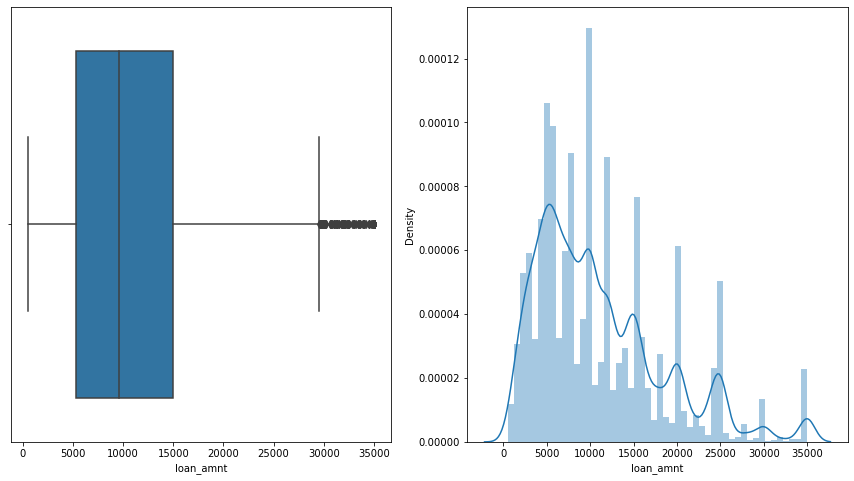

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


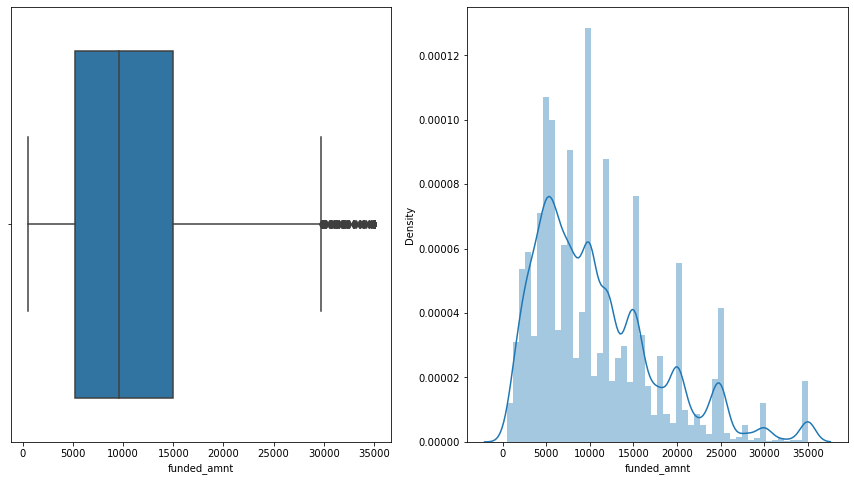

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


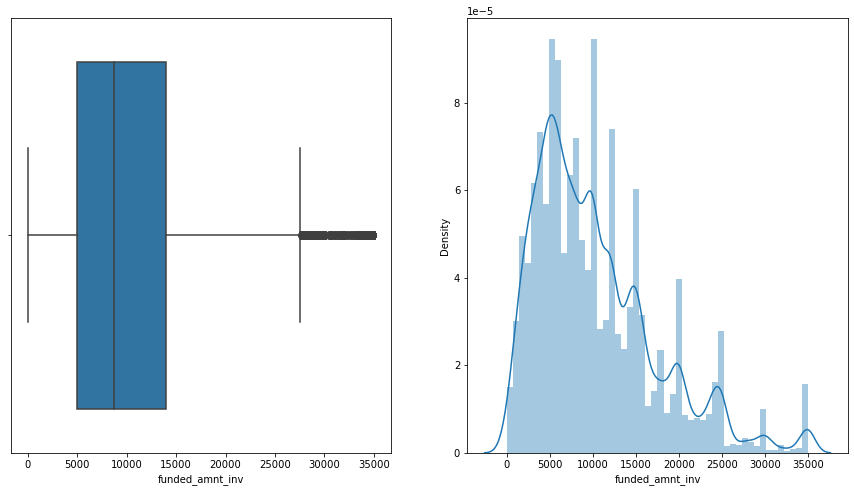

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


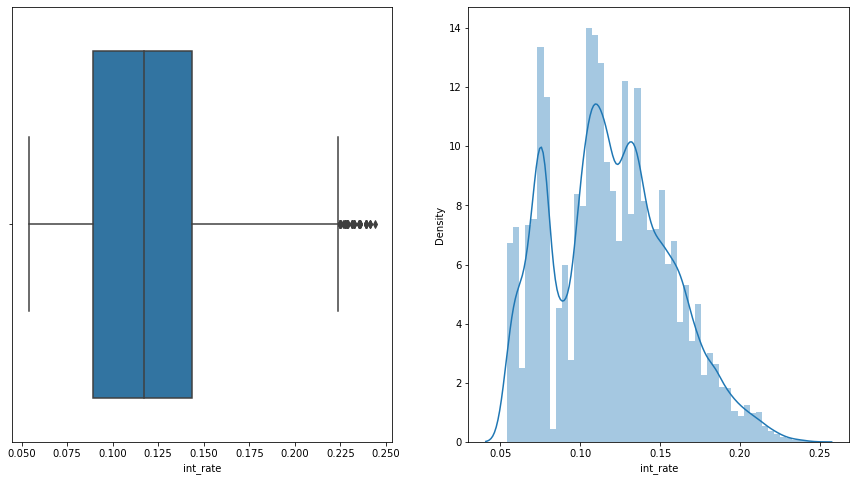

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


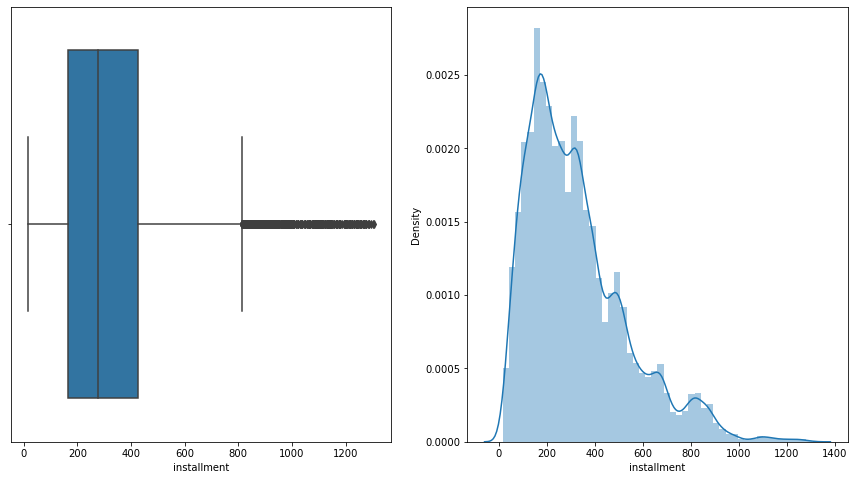

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


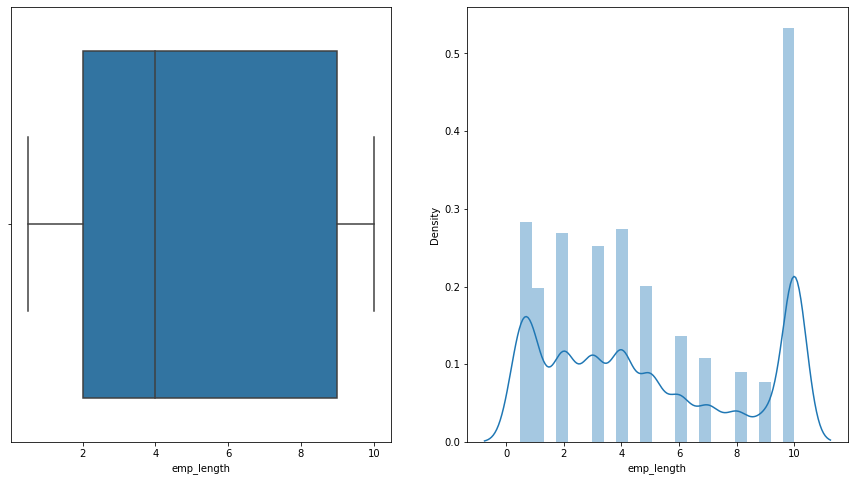

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


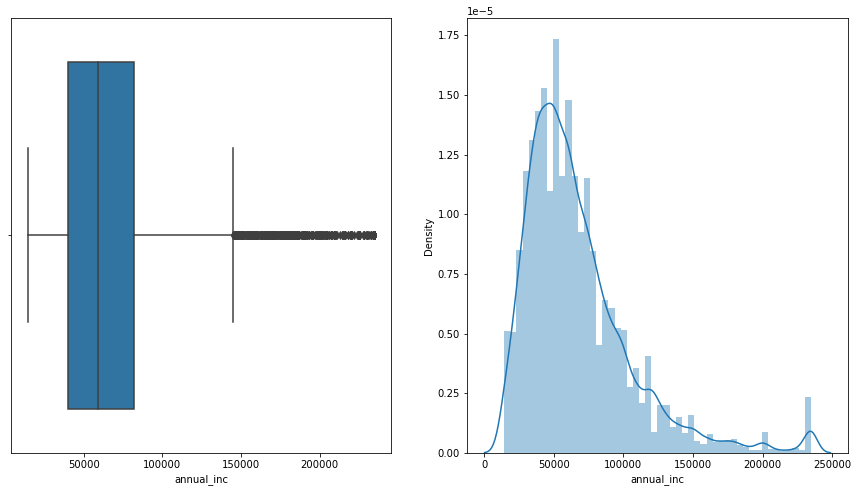

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


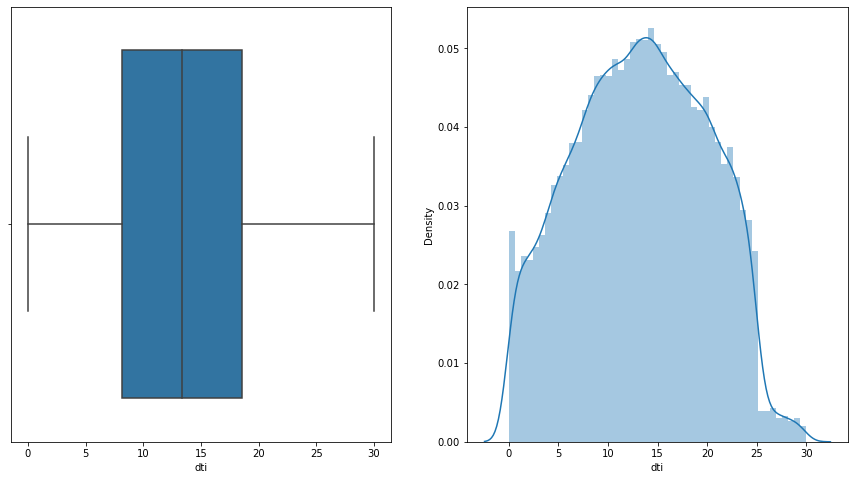

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


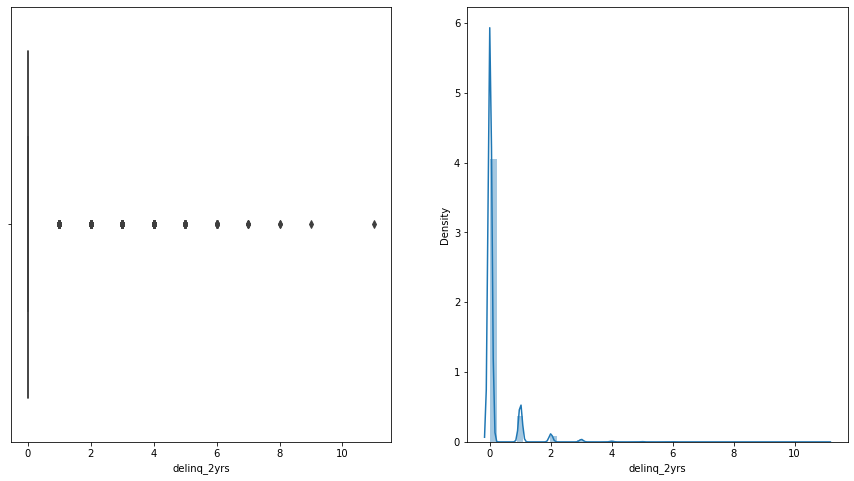

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


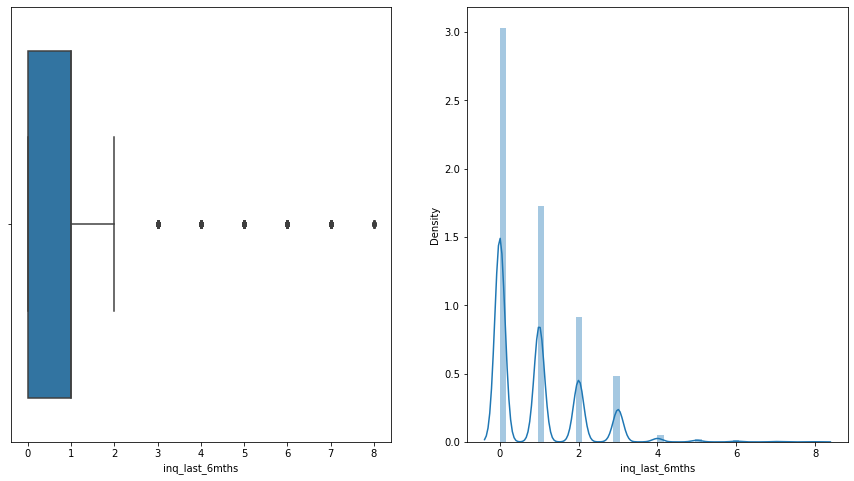

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


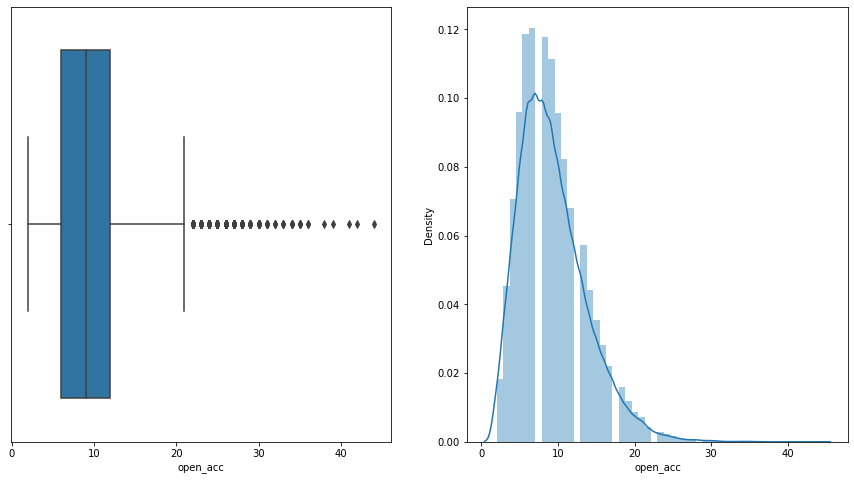

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


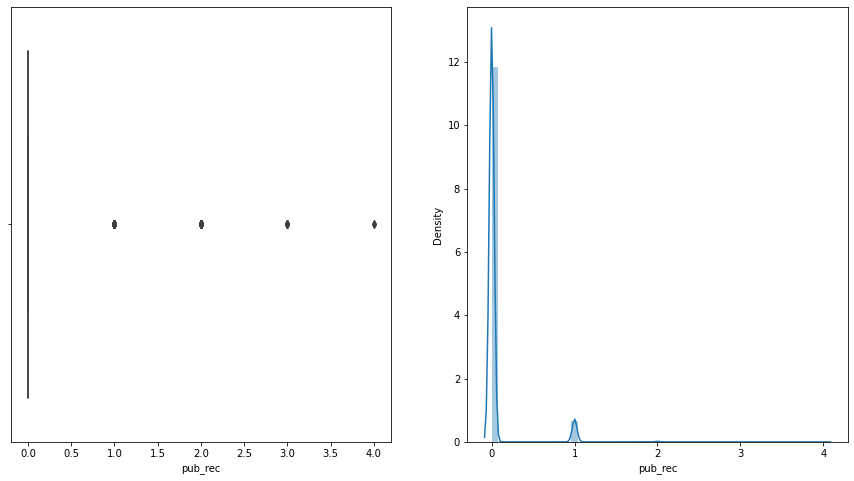

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


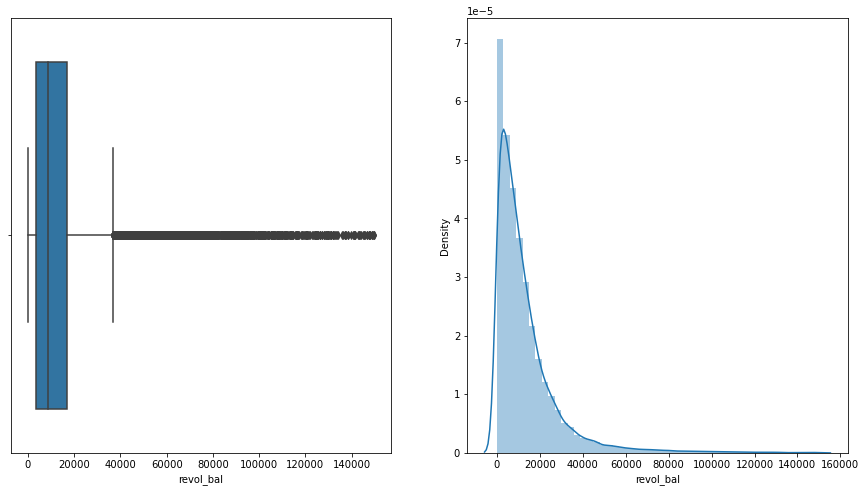

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


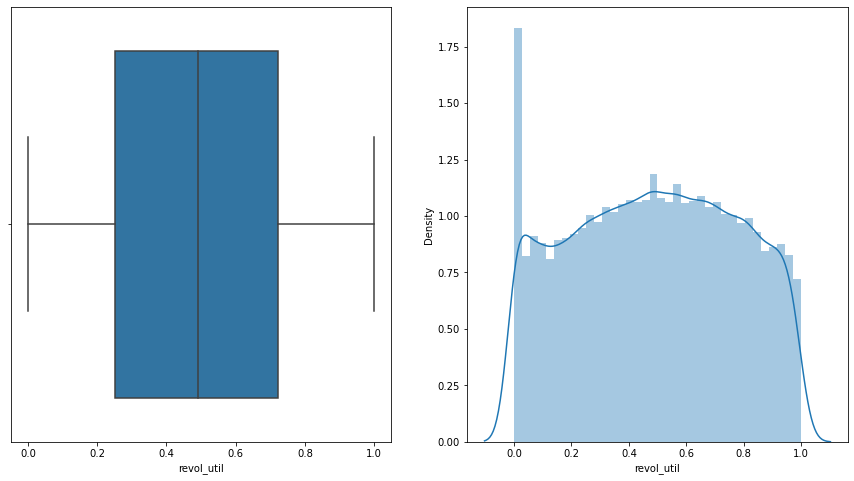

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


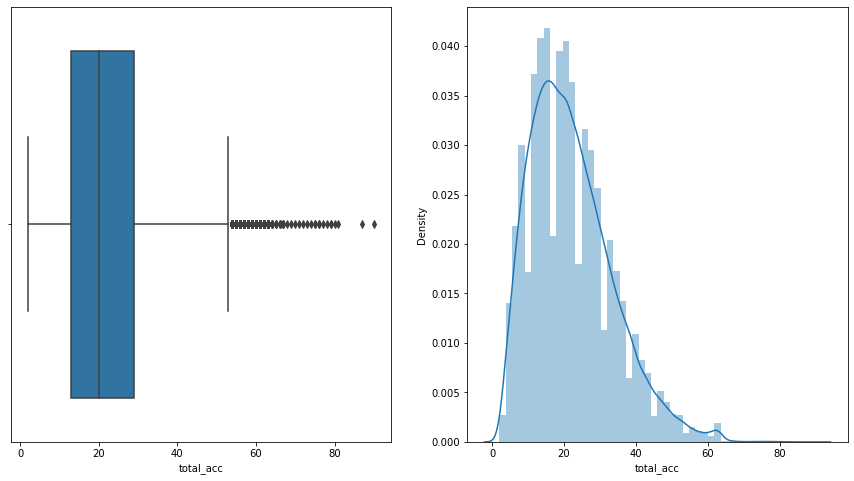

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


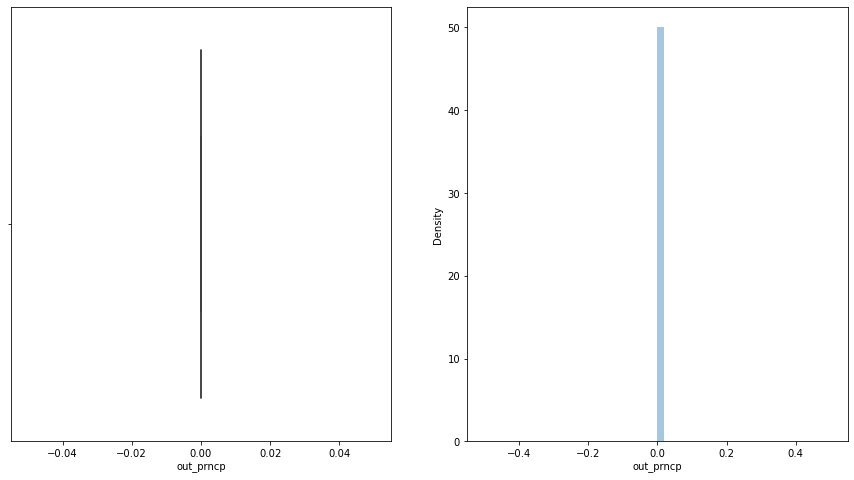

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


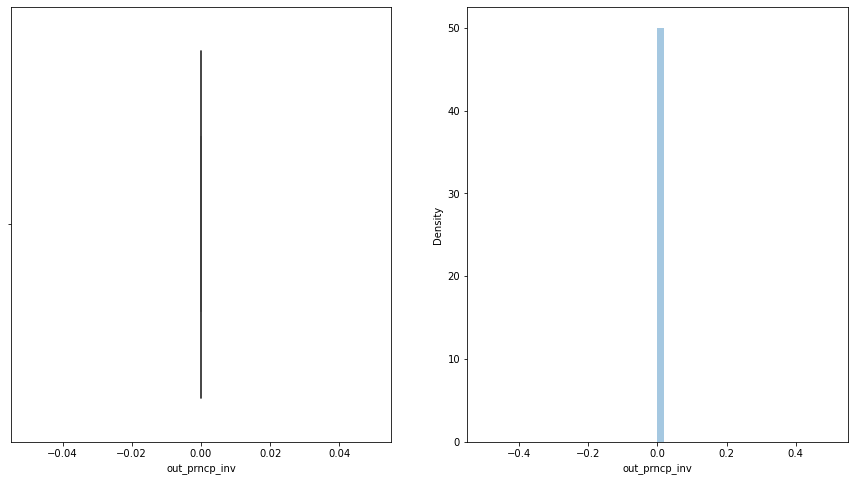

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


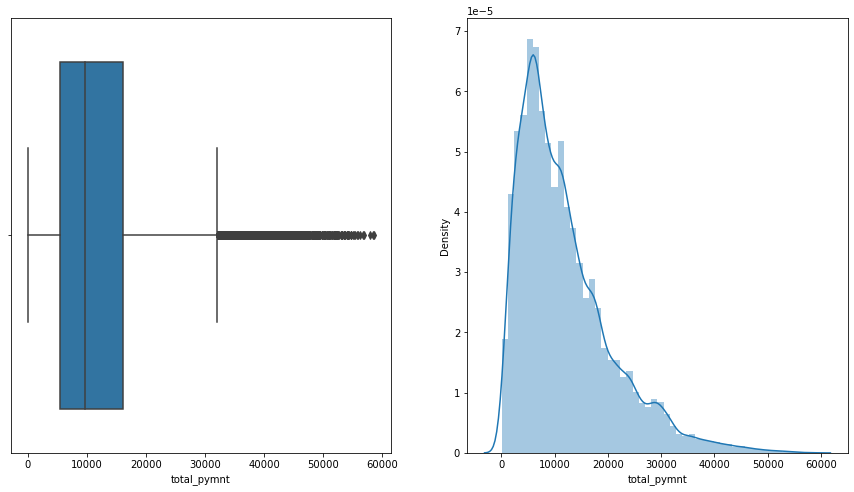

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


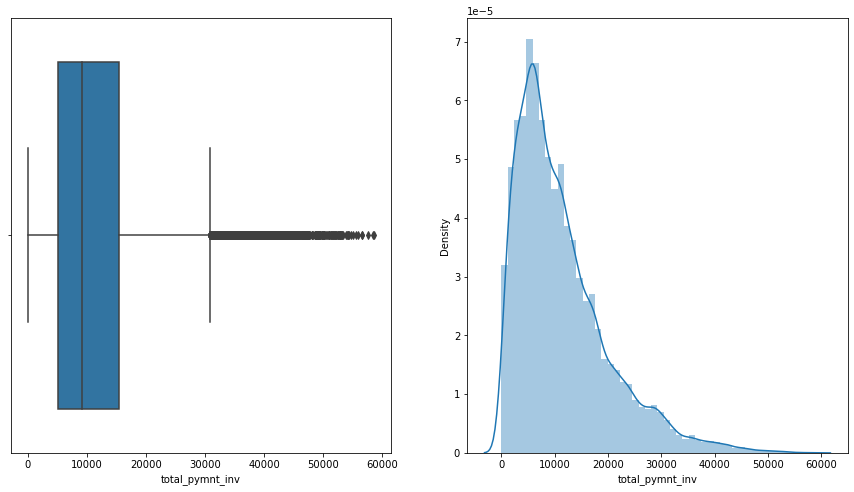

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


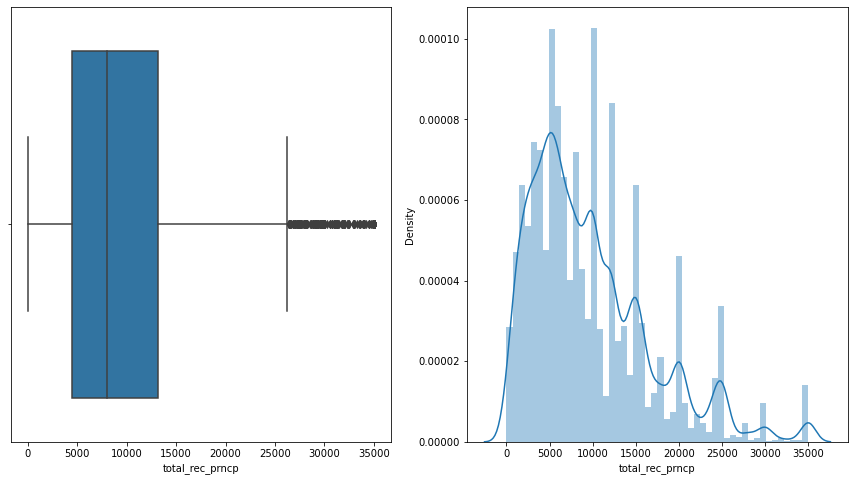

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


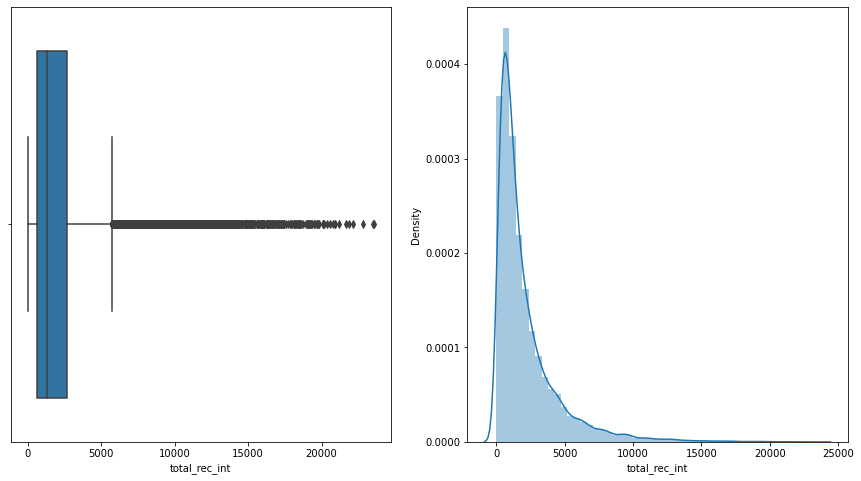

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


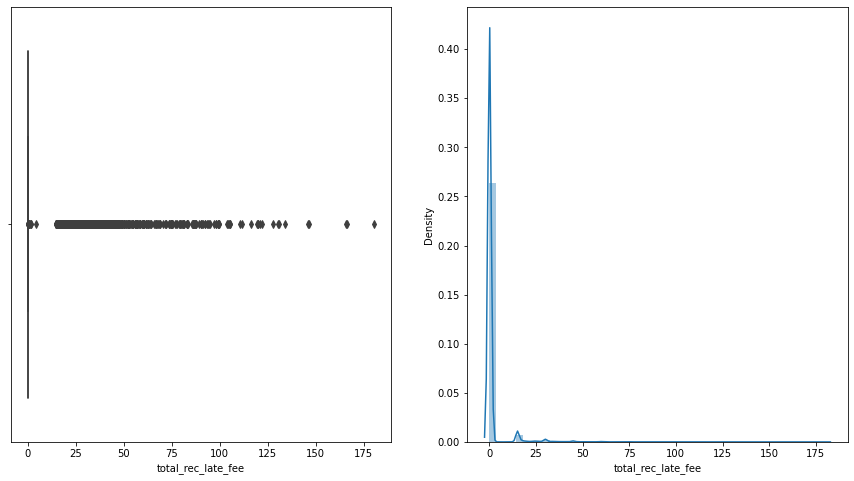

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


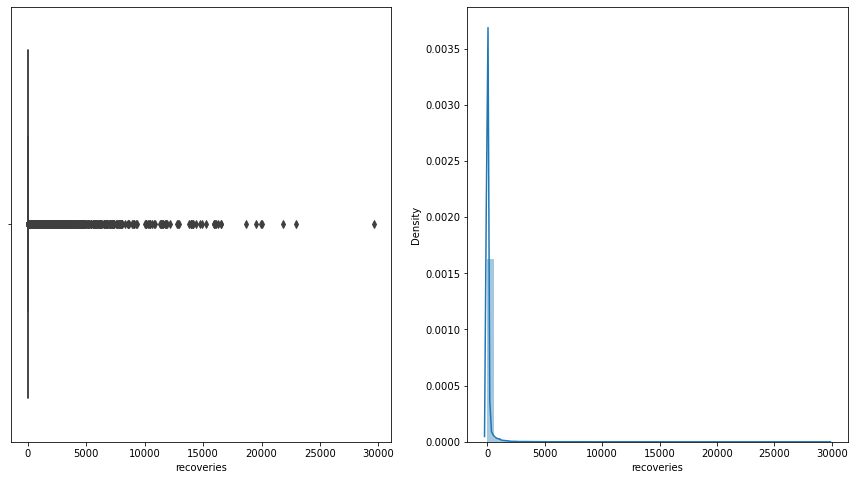

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


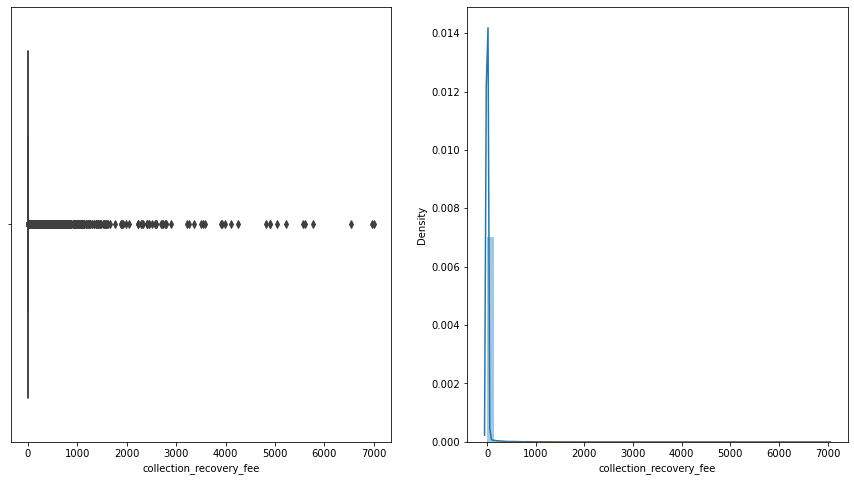

C:\Users\tvss9\anaconda3\envs\lending_club_case_study\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


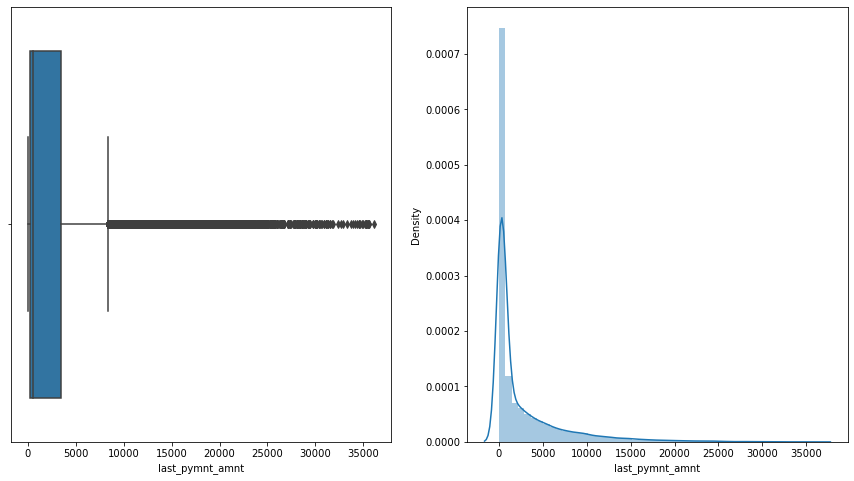

In [69]:
for column in numeric_vars:
    plt.figure(figsize= (15, 8)) 
    plt.subplot(1, 2, 1)
    sns.boxplot(x=column, data=eda_df)
    plt.subplot(1, 2, 2)
    sns.distplot(eda_df[column])
    plt.show()

Observations
1. loan_amount, funded_amount, funded_amount_inv are highly correlated. Need to do correlation analysis.
2. Outliers in installment and int rate need not be treated as they may speak to some insights, and not very far off from other values
3. However, Outlier in annual income needs to be treated

#### Correlation Analysis and Outlier Treatment

In [37]:
corr_df= eda_df[numeric_vars].corr().unstack().reset_index()
corr_df.columns = ['var1','var2','correl']
corr_df = corr_df.loc[corr_df.var1!=corr_df.var2,:] # Filter out same vars
corr_df = corr_df.loc[corr_df.var1 > corr_df.var2,:] # Make sure one combination comes only one time
corr_df = corr_df.loc[corr_df.correl.abs()>0.6,:].sort_values('correl',ascending=False) # Filter all variables with >0.6 absolute correlation
corr_df

,var1,var2,correl
1,loan_amnt,funded_amnt,0.98
492,total_rec_prncp,total_pymnt,0.97
467,total_pymnt_inv,total_pymnt,0.97
101,installment,funded_amnt,0.96
51,funded_amnt_inv,funded_amnt,0.96
493,total_rec_prncp,total_pymnt_inv,0.94
2,loan_amnt,funded_amnt_inv,0.94
4,loan_amnt,installment,0.93
452,total_pymnt_inv,funded_amnt_inv,0.91
102,installment,funded_amnt_inv,0.91


Based on correlation analysis , we can atleast very comfortably keep only one variable out of all correlations above 0.9.
So removing  funded_amnt,total_pymnt, total_rec_prncp,installment

In [38]:
numeric_vars = [x for x in numeric_vars if x not in ['funded_amnt','total_pymnt', 'total_rec_prncp','installment']]

In [39]:
## Outlier treatments 
eda_df['annual_inc'].quantile([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])

0.00       4,000.00
0.01      14,400.00
0.05      24,000.00
0.10      30,000.00
0.25      40,000.00
0.50      59,000.00
0.75      82,000.00
0.90     115,147.51
0.95     140,004.00
0.99     234,582.00
1.00   6,000,000.00
Name: annual_inc, dtype: float64

In [40]:
lower_cap= eda_df['annual_inc'].quantile(0.01)
upper_cap= eda_df['annual_inc'].quantile(0.99)

In [41]:
#Cap values below 0.01%ile to 0.01%ile and above 99.9 percentile to 99.9 percentile
eda_df['annual_inc']=np.where(eda_df['annual_inc']<lower_cap,lower_cap,eda_df['annual_inc'] )
eda_df['annual_inc']=np.where(eda_df['annual_inc']>upper_cap,upper_cap,eda_df['annual_inc'] )

#### Univariate Categorical EDA

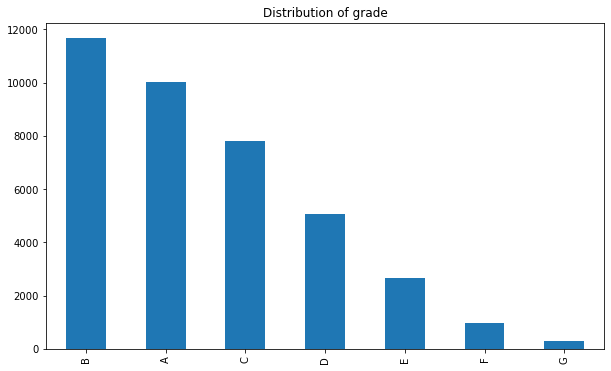

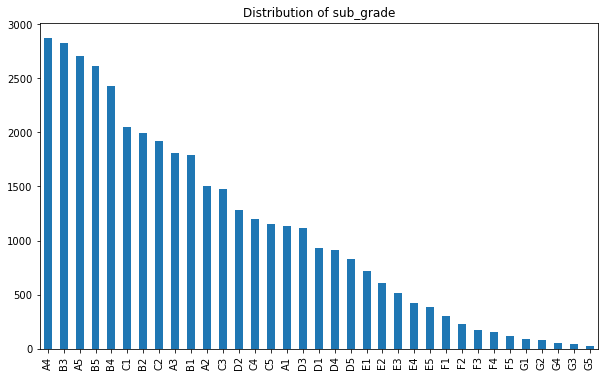

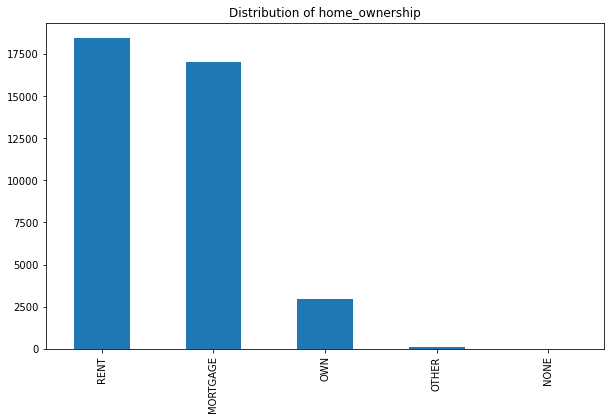

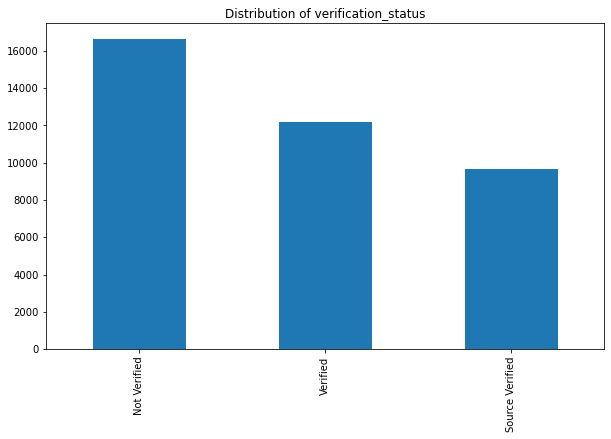

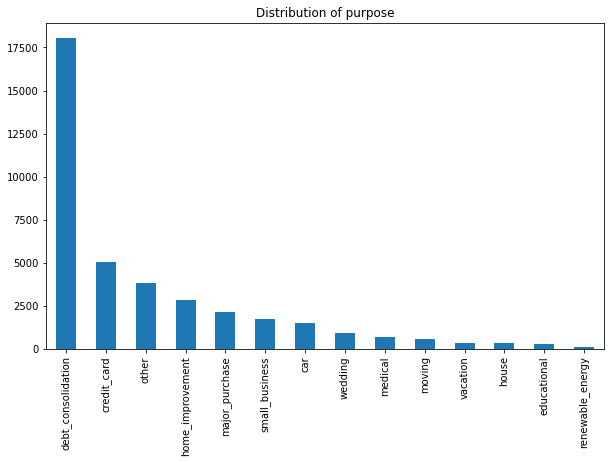

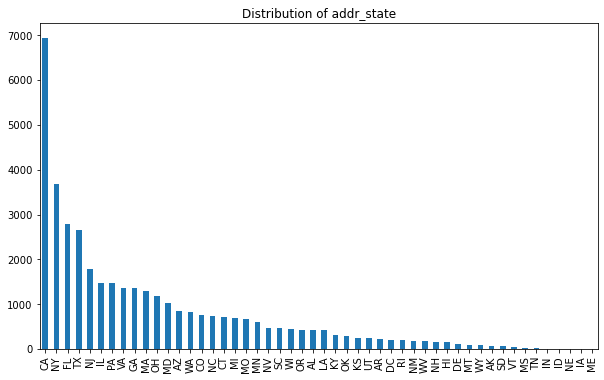

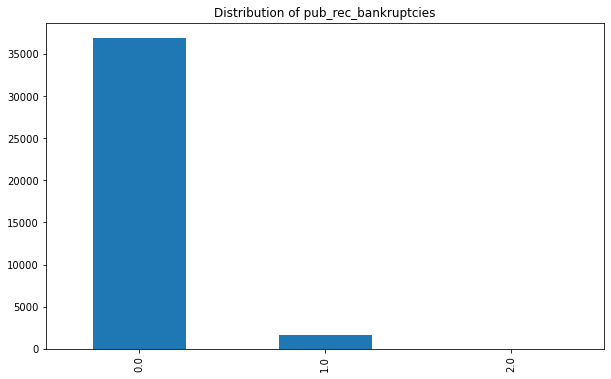

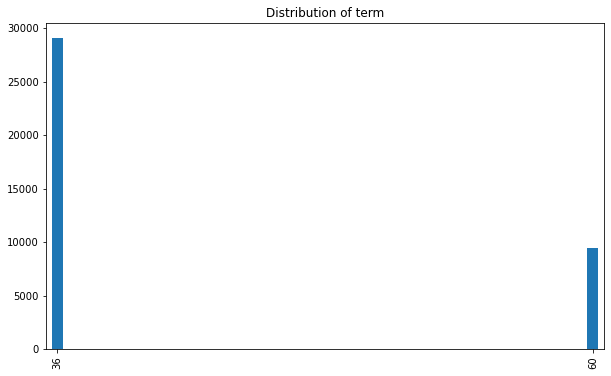

In [52]:

for col in cat_vars:
    eda_df[col].value_counts().sort_values(ascending=False).plot.bar(title= "Distribution of " + col, figsize=(10,6))
    plt.show()

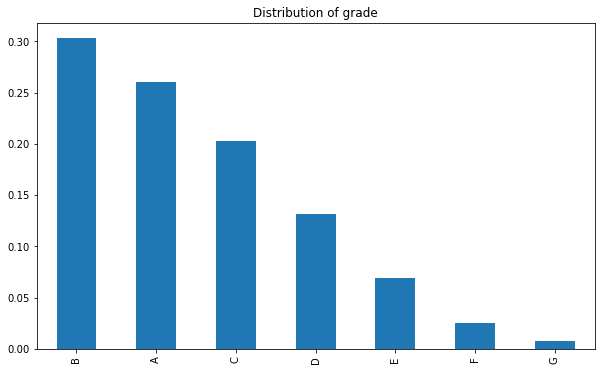

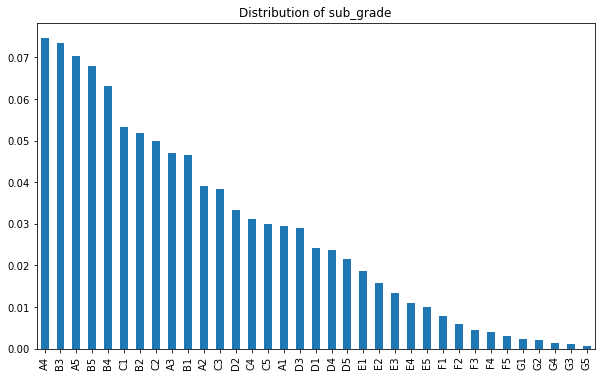

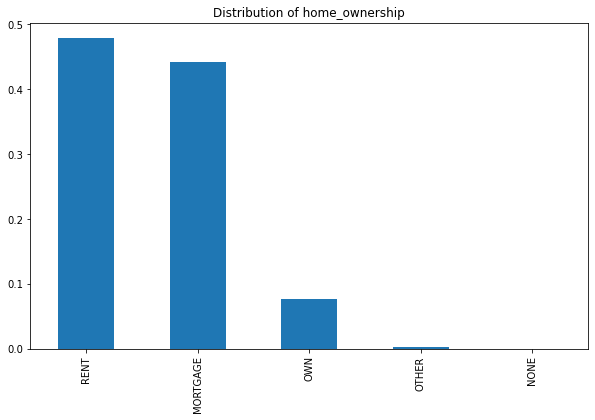

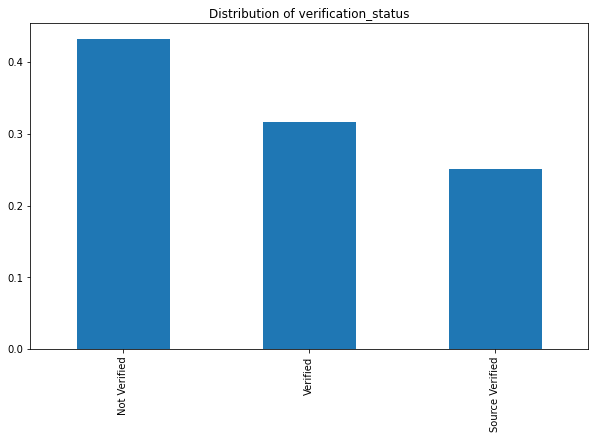

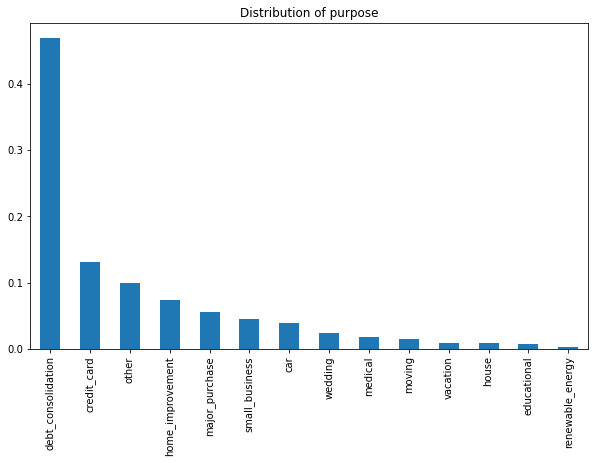

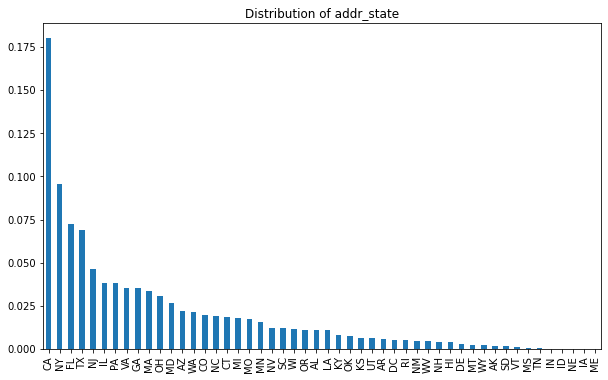

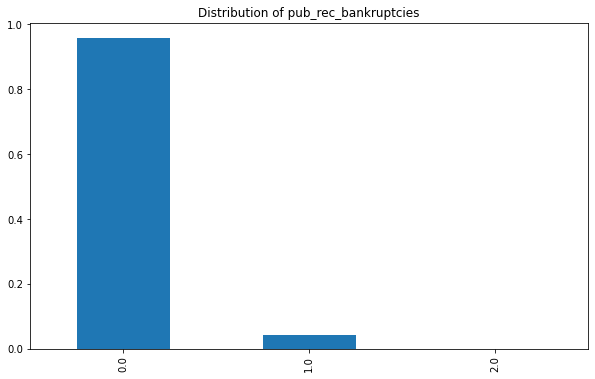

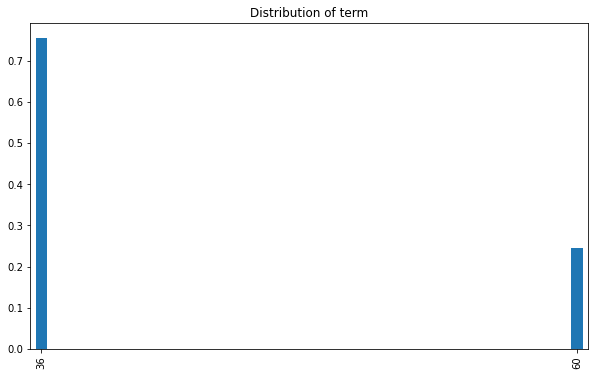

In [53]:
#Univariate Categorical EDA - Plot Percentages
for col in cat_vars:
    eda_df[col].value_counts(normalize=True).sort_values(ascending=False).plot.bar(title= "Distribution of " + col, figsize=(10,6))
    plt.show()

Observations:
1. greater than 55% of loans are in grades B,A
2. Nearly 85% of loans are in Rent and Mortgage ownership
3. ~50% of purposes are either debt consolidation or credit card
4. Mostly of the customers do not have any publicly recorded bankrupties
5. ~75% of loans are granted under 36 months terms